# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
print("ok")

ok


In [3]:
np.random.seed(0)
sns.set_theme()

In [4]:
df = pd.read_csv(
    "data/train.csv",
    index_col="id",
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [5]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [6]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 1235 individus.


In [7]:
TARGET = "outcome"

In [16]:
X.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [8]:
# var_quali =

#### Variables

In [9]:
X = df.copy()
y = X.pop(TARGET)

In [10]:
y.head()

id
0          died
1    euthanized
2         lived
3         lived
4         lived
Name: outcome, dtype: object

In [11]:
X.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes


# Découverte des données

## Analyse univariée

In [12]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [13]:
df.nunique()

surgery                    2
age                        2
hospital_number          255
rectal_temp               43
pulse                     50
respiratory_rate          37
temp_of_extremities        5
peripheral_pulse           5
mucous_membrane            7
capillary_refill_time      4
pain                       7
peristalsis                6
abdominal_distention       5
nasogastric_tube           4
nasogastric_reflux         5
nasogastric_reflux_ph     26
rectal_exam_feces          6
abdomen                    6
packed_cell_volume        49
total_protein             83
abdomo_appearance          4
abdomo_protein            54
surgical_lesion            2
lesion_1                  57
lesion_2                   4
lesion_3                   2
cp_data                    2
outcome                    3
dtype: int64

## Visualisation

### Variables numériques

ValueError: could not convert string to float: 'yes'

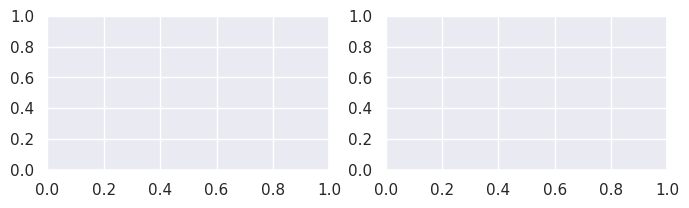

In [14]:
for var in X.columns:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

/tmp/ipykernel_6205/3032052463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()[X.corr().abs() > 0.5],
/home/ab2/.cache/pypoetry/virtualenvs/kaggle-competitions-qudAJOav-py3.10/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

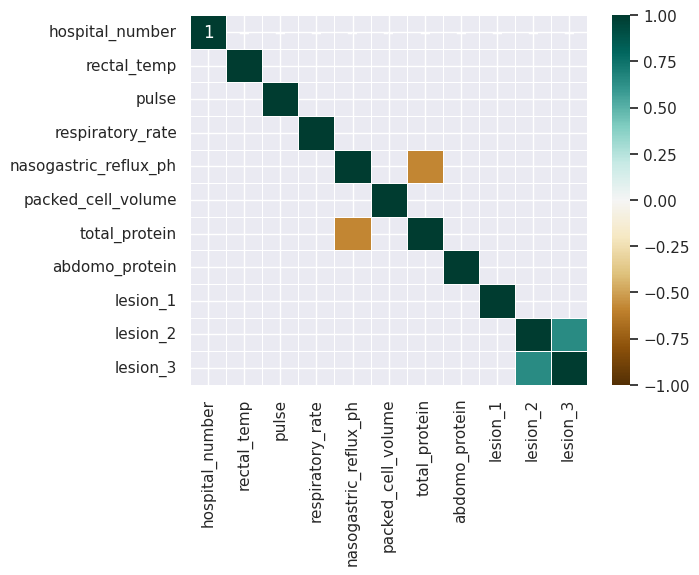

In [15]:
sns.heatmap(
    X.corr()[X.corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

In [ ]:
df.isna().sum()

### Variable cible

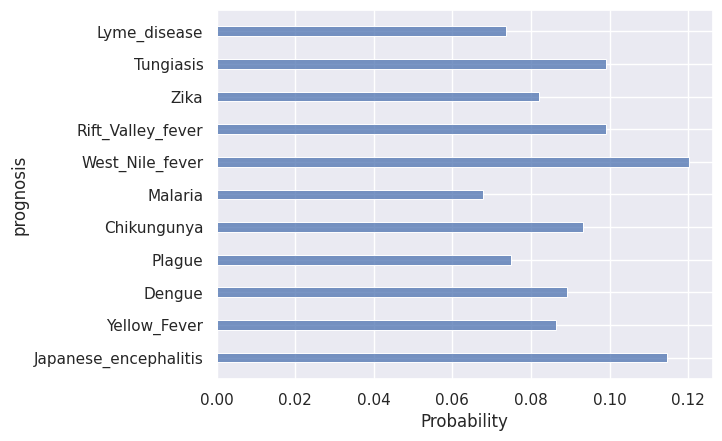

In [15]:
sns.histplot(y=y.astype(str), shrink=0.3, stat="probability")
plt.show()

In [13]:
y.value_counts(normalize=True)

West_Nile_fever          0.120226
Japanese_encephalitis    0.114569
Tungiasis                0.099010
Rift_Valley_fever        0.099010
Chikungunya              0.093352
Dengue                   0.089109
Yellow_Fever             0.086280
Zika                     0.082037
Plague                   0.074965
Lyme_disease             0.073550
Malaria                  0.067893
Name: prognosis, dtype: float64

In [14]:
y.value_counts()

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64

### Variable cible en fonction des autres variables

In [ ]:
for var in X.columns:
    _, ax = plt.subplots(1, 2, figsize=(10, 2))
    sns.boxplot(x=X[var], y=y.astype(str), width=0.25, ax=ax[0])
    sns.histplot(
        x=X[var],
        kde=True,
        ax=ax[1],
        hue=y.astype(str),
        stat="probability",
        common_norm=False,
    )
    plt.show()

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/data.csv")